# Module 16 - Principal Component Analysis

## Module Overview

In this module, you will focus on principal component analysis (PCA), a dimensionality reduction technique that captures the highest possible variance from a set number of dimensions. As with previous methods covered in this phase, you’ll learn both how to apply PCA to a dataset along with its best use cases and applications.

## Learning outcomes

- LO 1: Describe the value of PCA for exploratory data analysis and dimensionality reduction.
- LO 2: Interpret the variance of data points when plotting components in two dimensions.
- LO 3: Determine the optimal number of components to use for analysis.
- LO 4: Identify how the direction and location of principal components are calculated.
- LO 5: Prepare data for PCA by mean centring and variable scaling.
- LO 6: Apply the kernel trick in PCA of non-linear data.
- LO 7: Recognise advantages of applying PCA for problems where interpretability is a priority.

---

## Introduction to PCA

PCA is an unsupervised learning technique commonly used in exploratory data analysis and dimensionality reduction focusing solely on the structure and patterns within the data itself.

In high-dimensional datasets, where there may be many features or variables, it can be difficult to visualise or identify underlying patterns. PCA helps address this challenge by transforming the original features into a smaller set of new, uncorrelated variables known as principal components.

These components are linear combinations of the original variables, and each one captures a certain amount of the variance in the data:

- The **first principal component** is the direction (vector) in the data space along which the data varies the most.
- The **second principal component** is orthogonal (i.e., at a right angle) to the first and captures the next highest variance.
- This process continues for as many components as the number of original variables, though typically only the top few are retained.

By projecting the data onto these new axes, PCA achieves dimensionality reduction, often with minimal loss of information. This makes it easier to visualise complex datasets and can also improve the performance of other machine learning algorithms by removing noise and redundant features.

---

## Plotting and Interpreting Components

We interpret PCA in two ways:
- PCA represents the direction of highest variance
- In PCA, we look for the line that is closest to the observations

### Example

PCA tries to reduce the number of dimensions (features) in your data while keeping as much useful information as possible.

The assumption is: The most useful information in the data lies in the directions with the most variance.

So, PCA looks for the direction (a line) where, if you project the data onto it, the spread (variance) of the projected points is the highest. That direction becomes your first principal component.

Among all possible lines through the data, PCA picks the one where the data is most stretched out (i.e., where the variance is maximised).

The more the data varies along that line, the more information it carries.

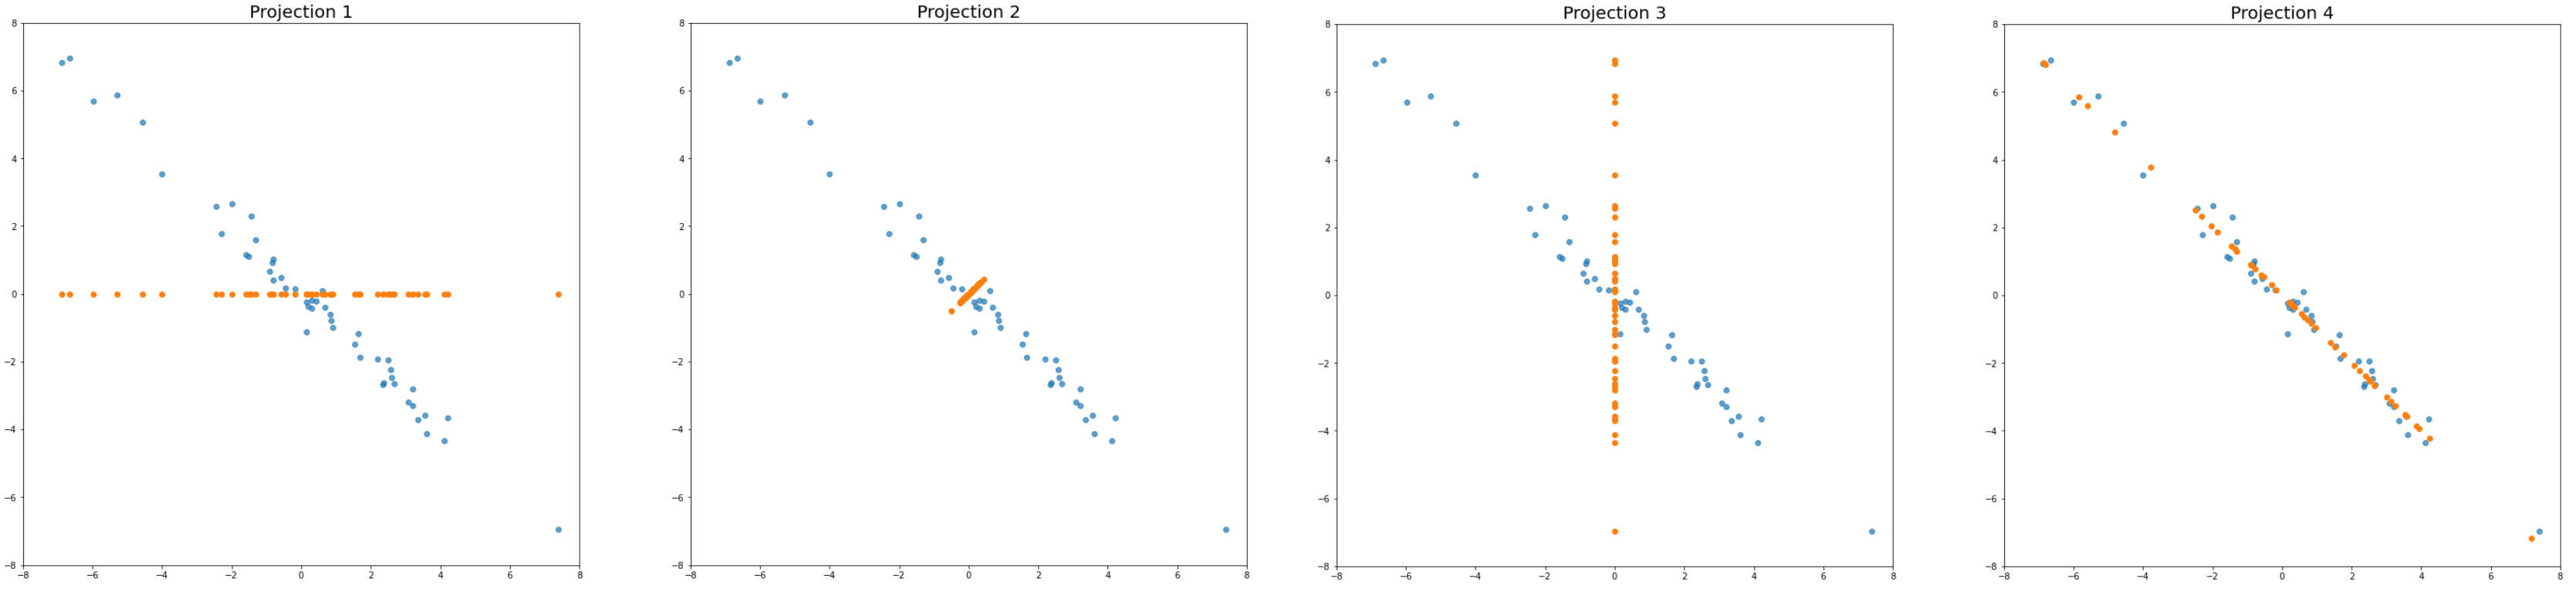

Projection 4 has the highest variance and therefore would be selected as the first principal component

---

## Determining How Many Components to Use

How do we know when to stop adding principal components?

In Principal Component Analysis (PCA), it's important to decide how many components to keep.
We aim to reduce the dimensionality of the data while retaining as much variance (information) as possible.

A common method to help decide this is the scree plot, which shows the proportion of variance explained by each component.
There are a few strategies we can use:

1. Cumulative Variance Threshold – e.g., keep components that explain 95% of the total variance.
2. Elbow Method – look for a sharp drop-off ("elbow") in the explained variance.
3. Minimum Variance Rule – stop if the next component explains less than, say, 1% of the variance.
4. Kaiser Criterion – keep components with eigenvalues > 1 (when using correlation matrix).
5. Model-based – choose based on how well the reduced data performs in a machine learning task.

### Example:

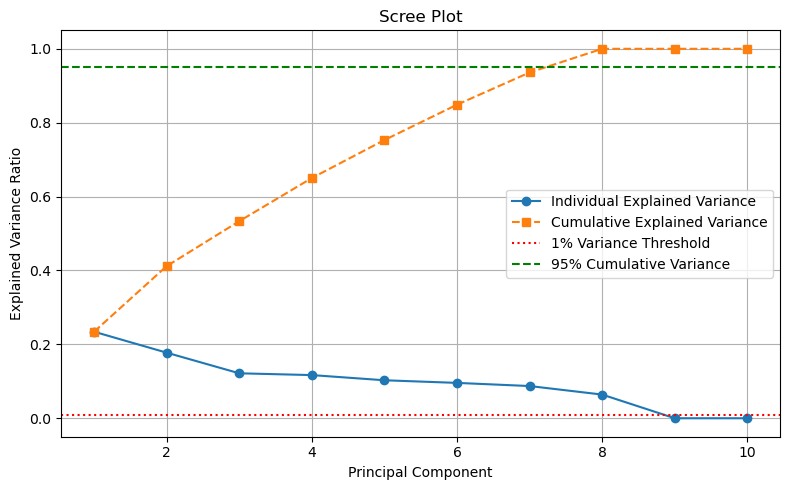

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate some synthetic data
X, _ = make_classification(
    n_samples=200, n_features=10, n_informative=5, n_redundant=2, random_state=42
)

# Standardise the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_var_ratio = pca.explained_variance_ratio_
cumulative_explained_var = np.cumsum(explained_var_ratio)

# Plotting the Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio, marker='o', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_explained_var) + 1), cumulative_explained_var, marker='s', label='Cumulative Explained Variance', linestyle='--')
plt.axhline(y=0.01, color='red', linestyle=':', label='1% Variance Threshold')
plt.axhline(y=0.95, color='green', linestyle='--', label='95% Cumulative Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


---
## Data Preprocessing for PCA

When performing PCA, pre-processing the data (including mean centering and standardisation) is crucial for ensuring that the principal components reflect the true underlying structure of the data, rather than being biased by differences in scale or variability across features. We should perform the following:

- **Mean centering** - each feature has a mean of 0.
- **Variable scaling** (Standardisation) - each feature has a standard deviation of 1
- **Remove missing values** - use impututation or remove missing data
- **Outlier detection / removal** - to avoid variance distortion

Pre-processed data will ensure the principal components represent true underlying patterns in the data and are scaled equally, so you can trust that the variance captured by these components is meaningful.

---

## Applying the Kernel Trick in PCA

The kernel trick allows us to project data points in a **nonlinear** way, enabling PCA to capture complex, nonlinear relationships in the data. Let's dive into how the kernel trick works in PCA and why it's useful.

### What is the Kernel Trick in PCA?

The **kernel trick** is a method used to project data into a higher-dimensional space where we can apply linear techniques like PCA, even when the data is inherently nonlinear in its original space. The key idea is that we compute the **inner products** (similarities) between data points in the higher-dimensional space without explicitly computing the transformation to that space.

#### Why Use the Kernel Trick?

PCA, in its standard form, is a **linear** technique. It works well for data that can be separated by a linear hyperplane, but many real-world datasets (e.g., images, text data, etc.) exhibit **nonlinear** structures. The kernel trick helps us apply PCA to these nonlinear relationships by mapping the data into a higher-dimensional space using a **nonlinear transformation**.

#### Nonlinear Mapping and Kernel Functions

Instead of applying PCA in the original feature space, kernel PCA maps the data into a higher-dimensional space where linear techniques like PCA can then be applied. This higher-dimensional space can be infinitely large depending on the kernel function used.

A **kernel function** computes the similarity (inner product) between two data points in the higher-dimensional space, without explicitly calculating the transformation.

#### Common Kernel Functions

Some commonly used kernel functions include:

##### 1. Polynomial Kernel:
The polynomial kernel maps the data to higher-dimensional polynomial spaces. The formula for the polynomial kernel is:

$$
K(x, y) = (x \cdot y + 1)^d
$$

Where $d$ is the degree of the polynomial.

##### 2. Gaussian (RBF) Kernel:
The Gaussian or Radial Basis Function (RBF) kernel is popular for capturing smooth nonlinearities in the data. The formula is:

$$
K(x, y) = \exp\left(-\frac{\|x - y\|^2}{2\sigma^2}\right)
$$

Where $\sigma$ is a parameter that controls the width of the Gaussian.

##### 3. Sigmoid Kernel:
The sigmoid kernel is based on the **hyperbolic tangent** function and is useful for certain neural network-like transformations:

$$
K(x, y) = \tanh(\alpha x \cdot y + c)
$$

Where $\alpha$ and $c$ are parameters.

#### How Does Kernel PCA Work?

1. **Compute the Kernel Matrix**:
   Instead of calculating the covariance matrix like in traditional PCA, we calculate the **kernel matrix** (Gram matrix), which stores the pairwise similarities between all data points using the kernel function.

2. **Eigenvalue Decomposition**:
   Perform eigenvalue decomposition on the kernel matrix. This will give us the principal components in the higher-dimensional space.

3. **Projection**:
   Once the eigenvectors and eigenvalues are computed, the data points can be projected onto the new principal components, similar to how it's done in regular PCA.

#### Advantages of Kernel PCA:

- **Capture Nonlinear Patterns**:
  Kernel PCA can uncover nonlinear relationships in data, which traditional PCA cannot capture.

- **Flexibility**:
  The kernel trick allows us to use different types of kernels, making it adaptable to a wide range of data types and relationships.

- **Better Data Separation**:
  Data that lies on a **curved manifold** (such as circles or spirals) can be more easily separated in the higher-dimensional space, where PCA finds a linear separation.

#### Challenges of Kernel PCA:

- **Computational Complexity**:
  Kernel PCA can be computationally expensive, especially for large datasets. The kernel matrix has size $n \times n$, where $n$ is the number of data points, leading to scalability issues.

- **Choosing the Right Kernel**:
  The choice of kernel and its parameters (such as $\sigma$ in the Gaussian kernel) is critical to the performance of Kernel PCA. An inappropriate kernel can lead to poor results.

- **Interpretability**:
  The principal components in the higher-dimensional space are more difficult to interpret compared to linear PCA components.

#### Applications of Kernel PCA:

- **Image Compression**:
  Kernel PCA is useful in **image processing** to reduce dimensionality in data with nonlinear patterns (e.g., textures or shapes).

- **Pattern Recognition**:
  Kernel PCA can be applied to **classification** tasks, especially where data has nonlinear relationships between features.

- **Nonlinear Dimensionality Reduction**:
  When data lies on a nonlinear manifold, kernel PCA can be a powerful tool for **manifold learning**.


---

## Applications for PCA

- Cancer, like many biological systems, provides very high-dimensional data. High-dimensional data like this introduces many challenges, such as overfitting and increased training times for models. PCA is used, among various other methods, to reduce the number of input dimensions that are considered when working on such data sets.
- Faces are the most distinctive and recognisable part of the human body, and the ability to correctly identify them is of huge value – from social networks tagging people automatically to Amazon Fresh launching walk-out stores. One of the more straightforward yet effective approaches to facial recognition is the eigenface approach. In this approach, faces are projected onto a lower-dimensional subspace, which is found using PCA, and a match between spaces is found by finding the minimum distance between the faces in this new lower-dimensional latent space.
- Among the largest use cases for PCA is as a preprocessing step, used to reduce the dimensionality of the data before being analysed using the techniques you have been or will be introduced to in this programme. As a result, PCA is used in almost every field, from medicine and physics to art and linguistics.

You can read more about the uses of PCA in a variety of fieldsin this review by Felipe L. Gewers et al. https://arxiv.org/pdf/1804.02502

---

## The Math Behind PCA

PCA transforms your dataset into a new coordinate system based on the directions of **maximum variance**.

### What does that mean?

Let’s say we have a dataset with $p$ features:  
$X_1, X_2, ..., X_p$

PCA creates new features called **principal components**, which are **linear combinations** of the original features.

### First Principal Component

The **first principal component (PC1)** is defined as:

$$
Z_1 = \phi_{11}X_1 + \phi_{21}X_2 + \cdots + \phi_{p1}X_p
$$

- $Z_1$ is the **score** for the first principal component for each data point.
- $\phi_{j1}$ are the **loadings** (also called weights or coefficients), which make up the **loading vector** $\boldsymbol{\phi}_1$.
- These loadings define the direction in the feature space along which the variance is maximised.

We require that the loading vector is **normalised**, meaning:

$$
\sum_{j=1}^p \phi_{j1}^2 = 1
$$

This just ensures the direction has unit length (like a proper vector direction).


### What Are Score and Loading Vectors?

- **Loading vector** ($\boldsymbol{\phi}_1$): A vector with $p$ elements (one for each feature). It tells us **how much each original feature contributes** to the principal component.
- **Score vector** ($Z_1$): A vector with $n$ elements (one for each data point). It tells us the **value of that principal component** for each observation.


### What is a Loading Vector in PCA?

A **loading vector** tells us **how much each original feature contributes** to a given principal component.

You can think of it as a set of **weights** used to calculate a principal component as a combination of the original features.

### Example with 3 Features

Suppose we have 3 features: $X_1$, $X_2$, and $X_3$.  
The first principal component (PC1) is defined as:

$$
\text{PC1} = \phi_{11}X_1 + \phi_{21}X_2 + \phi_{31}X_3
$$

Here:
- $\phi_{11}$, $\phi_{21}$, and $\phi_{31}$ are the **loadings**
- Together, they form the **loading vector** for PC1:

$$
\boldsymbol{\phi}_1 =
\begin{bmatrix}
\phi_{11} \\
\phi_{21} \\
\phi_{31}
\end{bmatrix}
$$

This vector defines the **direction** of the principal component in the original feature space.

### Interpretation

- A **large loading** (positive or negative) means the corresponding feature contributes **strongly** to the principal component.
- A **small or zero loading** means the feature contributes **very little**.
- If one loading dominates, the component is aligned mostly with that feature.
- If all loadings are roughly equal, the component is a balanced mix of features.


### One Loading Vector per Component

Each principal component has its own loading vector:
- PC1 → $\boldsymbol{\phi}_1$
- PC2 → $\boldsymbol{\phi}_2$
- ...
- PC$k$ → $\boldsymbol{\phi}_k$

If your dataset has $p$ features and you keep $k$ principal components, you will have $k$ loading vectors, each with $p$ elements.
